In [4]:
# instala mido
#pip install mido

SyntaxError: invalid syntax (3954521327.py, line 2)

In [5]:
# Manipulación de datos
import pandas as pd
import numpy as np

In [6]:
import mido
# todos los tracks del archivo
mid = mido.MidiFile('./Yesterday(StringsOnly).mid', clip=True)
mid.tracks

[MidiTrack([
   MetaMessage('track_name', name='Yesterday', time=0),
   MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
   MetaMessage('key_signature', key='F', time=0),
   MetaMessage('set_tempo', tempo=631577, time=0),
   Message('program_change', channel=2, program=40, time=0),
   Message('control_change', channel=2, control=11, value=100, time=0),
   Message('note_on', channel=2, note=69, velocity=56, time=0),
   Message('control_change', channel=2, control=101, value=0, time=0),
   Message('control_change', channel=2, control=100, value=0, time=0),
   Message('control_change', channel=2, control=6, value=6, time=0),
   Message('program_change', channel=3, program=40, time=0),
   Message('control_change', channel=3, control=11, value=100, time=0),
   Message('note_on', channel=3, note=65, velocity=56, time=0),
   Message('control_change', channel=3, control=101, value=0, time=0),
   Message('control_change', cha

In [7]:
# mensajes en el track 1
for m in mid.tracks[0][:20]:
    print(m)

MetaMessage('track_name', name='Yesterday', time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('key_signature', key='F', time=0)
MetaMessage('set_tempo', tempo=631577, time=0)
program_change channel=2 program=40 time=0
control_change channel=2 control=11 value=100 time=0
note_on channel=2 note=69 velocity=56 time=0
control_change channel=2 control=101 value=0 time=0
control_change channel=2 control=100 value=0 time=0
control_change channel=2 control=6 value=6 time=0
program_change channel=3 program=40 time=0
control_change channel=3 control=11 value=100 time=0
note_on channel=3 note=65 velocity=56 time=0
control_change channel=3 control=101 value=0 time=0
control_change channel=3 control=100 value=0 time=0
control_change channel=3 control=6 value=6 time=0
program_change channel=4 program=41 time=0
control_change channel=4 control=11 value=100 time=0
note_on channel=4 note=60 velocity=56 time=0
contro

In [8]:
#[note, note_on(time), note_off(time), channel]
mididict = []
output = []

for i in mid:
    if i.type == 'note_on' or i.type == 'note_off' or i.type == 'time_signature':
        mididict.append(i.dict())
# change time values from delta to relative time.
mem1=0
for i in mididict:
    time = i['time'] + mem1
    i['time'] = time
    mem1 = i['time']
# make every note_on with 0 velocity note_off
    if i['type'] == 'note_on' and i['velocity'] == 0:
        i['type'] = 'note_off'
# put note, starttime, stoptime, as nested list in a list. # format is [type, note, time, channel]
    mem2=[]
    if i['type'] == 'note_on' or i['type'] == 'note_off':
        mem2.append(i['type'])
        mem2.append(i['note'])
        mem2.append(i['time'])
        mem2.append(i['channel'])
        output.append(mem2)
# put timesignatures
    if i['type'] == 'time_signature':
        mem2.append(i['type'])
        mem2.append(i['numerator'])
        mem2.append(i['denominator'])
        mem2.append(i['time'])
        output.append(mem2)
# viewing the midimessages.
for i in output:
    print(i)
print(mid.ticks_per_beat)

['time_signature', 4, 4, 0]
['note_on', 69, 0, 2]
['note_on', 65, 0, 3]
['note_on', 60, 0, 4]
['note_on', 53, 0, 5]
['note_off', 69, 2.5263079999999998, 2]
['note_on', 69, 2.5263079999999998, 2]
['note_off', 65, 2.5263079999999998, 3]
['note_on', 62, 2.5263079999999998, 3]
['note_off', 60, 2.5263079999999998, 4]
['note_on', 58, 2.5263079999999998, 4]
['note_off', 53, 2.5263079999999998, 5]
['note_on', 52, 2.5263079999999998, 5]
['note_off', 69, 3.7894619999999994, 2]
['note_on', 64, 3.7894619999999994, 2]
['note_off', 62, 3.7894619999999994, 3]
['note_on', 61, 3.7894619999999994, 3]
['note_off', 58, 3.7894619999999994, 4]
['note_on', 57, 3.7894619999999994, 4]
['note_off', 52, 3.7894619999999994, 5]
['note_on', 45, 3.7894619999999994, 5]
['note_off', 64, 5.0526159999999996, 2]
['note_on', 65, 5.0526159999999996, 2]
['note_off', 61, 5.0526159999999996, 3]
['note_on', 62, 5.0526159999999996, 3]
['note_off', 57, 5.0526159999999996, 4]
['note_on', 57, 5.0526159999999996, 4]
['note_off', 45

In [9]:
import pandas as pd
# formato [note, note_on(time), note_off(time), channel]
df_output_list = pd.DataFrame(output, columns=['message', 'note_on', 'time', 'channel'])
df_output_list

,message,note_on,time,channel
0,time_signature,4,4.00000,0
1,note_on,69,0.00000,2
2,note_on,65,0.00000,3
3,note_on,60,0.00000,4
4,note_on,53,0.00000,5
...,...,...,...,...
688,note_off,65,80.73103,2
689,note_off,57,80.73103,3
690,note_off,53,80.73103,4
691,note_off,48,80.73103,4


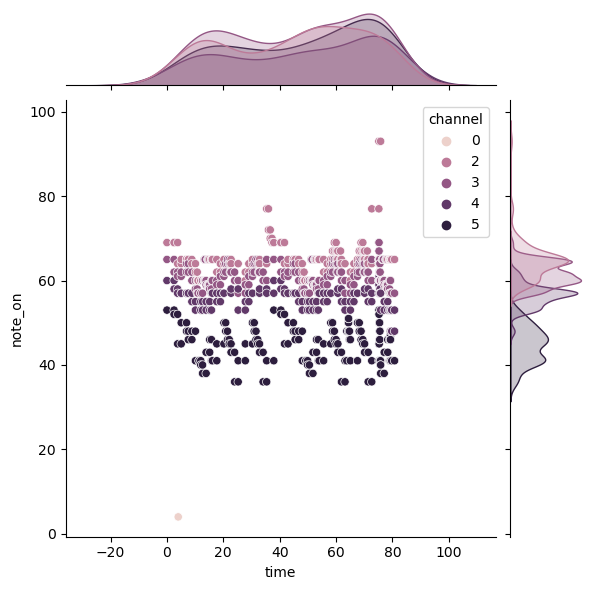

In [10]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = df_output_list

# draw jointplot with
# hex kind
sns.jointplot(x = "time", y = "note_on", hue = "channel", data = data)
# show the plot
plt.show()

# This code is contributed
# by Deepanshu Rustagi.


In [11]:
# crear el index 'message' de df_output_list
df_midi_onetrack = df_output_list.set_index('message')
df_midi_onetrack

,note_on,time,channel
message,,,
time_signature,4,4.00000,0
note_on,69,0.00000,2
note_on,65,0.00000,3
note_on,60,0.00000,4
note_on,53,0.00000,5
...,...,...,...
note_off,65,80.73103,2
note_off,57,80.73103,3
note_off,53,80.73103,4


In [12]:
df_midi_onetrack_noton = df_midi_onetrack.loc['note_on']
df_midi_onetrack_noton
df_midi_onetrack_notoff = df_midi_onetrack.loc['note_off']
df_midi_onetrack_notoff

,note_on,time,channel
message,,,
note_off,69,2.526308,2
note_off,65,2.526308,3
note_off,60,2.526308,4
note_off,53,2.526308,5
note_off,69,3.789462,2
...,...,...,...
note_off,65,80.731030,2
note_off,57,80.731030,3
note_off,53,80.731030,4


In [13]:
# notas unicas
arr_unique_notes_on = df_midi_onetrack_noton['note_on'].unique()
arr_unique_notes_on

array([69, 65, 60, 53, 62, 58, 52, 64, 61, 57, 45, 50, 48, 46, 55, 41, 40,
       38, 59, 43, 36, 77, 72, 70, 67, 51, 93, 47])

In [14]:
arr_unique_notes_off = df_midi_onetrack_notoff['note_on'].unique()
arr_unique_notes_off

array([69, 65, 60, 53, 62, 58, 52, 64, 61, 57, 45, 50, 48, 46, 55, 41, 40,
       38, 59, 43, 36, 77, 72, 70, 67, 51, 93, 47])

In [15]:
# prueba en pequeño
y = df_midi_onetrack_notoff[df_midi_onetrack_notoff['note_on'] == 69][['time','channel']].values.tolist()
y

[[2.5263079999999998, 2.0],
 [3.7894619999999994, 2.0],
 [37.89461999999999, 2.0],
 [40.42092799999999, 2.0],
 [41.68408199999999, 2.0],
 [59.99981499999996, 2.0],
 [69.48004892708326, 2.0],
 [75.22739962708326, 3.0]]

In [16]:
x = df_midi_onetrack_noton[df_midi_onetrack_noton['note_on'] == 69]['time'].values.tolist()
x

[0.0,
 2.5263079999999998,
 37.26304299999999,
 37.89461999999999,
 40.42092799999999,
 59.36823799999996,
 68.84847192708327,
 75.16424192708325]

In [17]:
# len = 346
#print(len(x))
#print(len(y))
ls_times_notes = []
for i in range(len(x)):
  note = 69
  time_s = x[i]
  time_f = y[i][0]
  channel = y[i][1]
  ls_times_notes.append([note, time_s, time_f, channel])
  print(f"{i},{time_s},{time_f}")
df_69_note_ts = pd.DataFrame(ls_times_notes,columns =['note', 'time_s', 'time_f', 'channel'])
#df_69_note_ts.set_index('note', inplace=True)
df_69_note_ts

0,0.0,2.5263079999999998
1,2.5263079999999998,3.7894619999999994
2,37.26304299999999,37.89461999999999
3,37.89461999999999,40.42092799999999
4,40.42092799999999,41.68408199999999
5,59.36823799999996,59.99981499999996
6,68.84847192708327,69.48004892708326
7,75.16424192708325,75.22739962708326


,note,time_s,time_f,channel
0,69,0.000000,2.526308,2.0
1,69,2.526308,3.789462,2.0
2,69,37.263043,37.894620,2.0
3,69,37.894620,40.420928,2.0
4,69,40.420928,41.684082,2.0
5,69,59.368238,59.999815,2.0
6,69,68.848472,69.480049,2.0
7,69,75.164242,75.227400,3.0


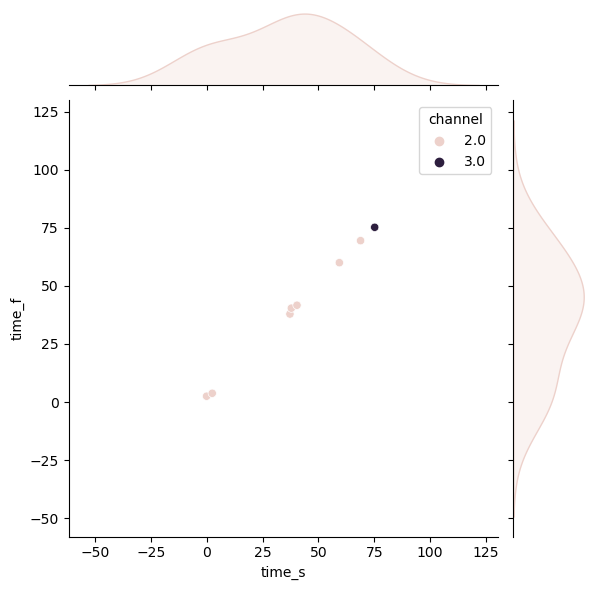

In [18]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = df_69_note_ts

# draw jointplot with
# hex kind
sns.jointplot(x = "time_s", y = "time_f", hue = "channel", data = data)
# show the plot
plt.show()

In [19]:
# los puntos no pueden ser time_s, time_f
# ahora x es el tiempo y y la nota
# valores en Y
mi_y = []
for i in arr_unique_notes_on:
  temp = df_midi_onetrack_notoff[df_midi_onetrack_notoff['note_on'] == i][['time','channel']].values.tolist()
  #print(i, temp, len(temp))
  [ mi_y.append([i] + x) for x in temp ]
  #print(i,temp)
  #if(len(temp) > 0):
    #mi_y += temp
type(mi_y)
mi_y

[[69, 2.5263079999999998, 2.0],
 [69, 3.7894619999999994, 2.0],
 [69, 37.89461999999999, 2.0],
 [69, 40.42092799999999, 2.0],
 [69, 41.68408199999999, 2.0],
 [69, 59.99981499999996, 2.0],
 [69, 69.48004892708326, 2.0],
 [69, 75.22739962708326, 3.0],
 [65, 2.5263079999999998, 3.0],
 [65, 6.947346999999999, 2.0],
 [65, 7.578923999999999, 2.0],
 [65, 8.842077999999999, 2.0],
 [65, 13.5789055, 2.0],
 [65, 13.5789055, 3.0],
 [65, 14.8420595, 2.0],
 [65, 14.8420595, 3.0],
 [65, 15.789425, 2.0],
 [65, 16.105213499999998, 2.0],
 [65, 17.684155999999998, 2.0],
 [65, 22.105195, 3.0],
 [65, 22.736772, 2.0],
 [65, 32.210426999999996, 3.0],
 [65, 32.84200399999999, 2.0],
 [65, 37.89461999999999, 3.0],
 [65, 40.42092799999999, 3.0],
 [65, 44.84196699999999, 2.0],
 [65, 45.47354399999999, 2.0],
 [65, 46.73669799999999, 2.0],
 [65, 51.47352549999998, 2.0],
 [65, 51.47352549999998, 3.0],
 [65, 52.73667949999997, 2.0],
 [65, 52.73667949999997, 3.0],
 [65, 53.68404499999997, 2.0],
 [65, 53.99983349999996

In [20]:
# valores en X
mi_x = []
for i in arr_unique_notes_on:
  temp = df_midi_onetrack_noton[df_midi_onetrack_noton['note_on'] == i][['time','channel']].values.tolist()
  #print(i, temp, len(temp))
  [ mi_x.append([i] + x) for x in temp ]
  #print(i,temp)
  #if(len(temp) > 0):
  #  mi_x += temp
type(mi_x)
mi_x

[[69, 0.0, 2.0],
 [69, 2.5263079999999998, 2.0],
 [69, 37.26304299999999, 2.0],
 [69, 37.89461999999999, 2.0],
 [69, 40.42092799999999, 2.0],
 [69, 59.36823799999996, 2.0],
 [69, 68.84847192708327, 2.0],
 [69, 75.16424192708325, 3.0],
 [65, 0.0, 3.0],
 [65, 5.0526159999999996, 2.0],
 [65, 6.947346999999999, 2.0],
 [65, 7.578923999999999, 2.0],
 [65, 13.263117, 2.0],
 [65, 13.263117, 3.0],
 [65, 14.526271, 2.0],
 [65, 14.526271, 3.0],
 [65, 15.157848, 2.0],
 [65, 15.789425, 2.0],
 [65, 16.105213499999998, 2.0],
 [65, 20.210463999999998, 2.0],
 [65, 21.473618, 3.0],
 [65, 30.315696, 2.0],
 [65, 31.57885, 3.0],
 [65, 35.36831199999999, 3.0],
 [65, 37.89461999999999, 3.0],
 [65, 42.94723599999999, 2.0],
 [65, 44.84196699999999, 2.0],
 [65, 45.47354399999999, 2.0],
 [65, 51.15773699999998, 2.0],
 [65, 51.15773699999998, 3.0],
 [65, 52.420890999999976, 2.0],
 [65, 52.420890999999976, 3.0],
 [65, 53.05246799999997, 2.0],
 [65, 53.68404499999997, 2.0],
 [65, 53.999833499999966, 2.0],
 [65, 58.

In [21]:
# generamos el framework X con Y
ls_times_notes_track = []
for i in range(len(mi_x)):
  note = mi_x[i][0]
  time_s = mi_x[i][1]
  time_f = mi_y[i][1]
  channel = mi_y[i][2]
  ls_times_notes_track.append([note, time_s, time_f, channel])
ls_times_notes_track

[[69, 0.0, 2.5263079999999998, 2.0],
 [69, 2.5263079999999998, 3.7894619999999994, 2.0],
 [69, 37.26304299999999, 37.89461999999999, 2.0],
 [69, 37.89461999999999, 40.42092799999999, 2.0],
 [69, 40.42092799999999, 41.68408199999999, 2.0],
 [69, 59.36823799999996, 59.99981499999996, 2.0],
 [69, 68.84847192708327, 69.48004892708326, 2.0],
 [69, 75.16424192708325, 75.22739962708326, 3.0],
 [65, 0.0, 2.5263079999999998, 3.0],
 [65, 5.0526159999999996, 6.947346999999999, 2.0],
 [65, 6.947346999999999, 7.578923999999999, 2.0],
 [65, 7.578923999999999, 8.842077999999999, 2.0],
 [65, 13.263117, 13.5789055, 2.0],
 [65, 13.263117, 13.5789055, 3.0],
 [65, 14.526271, 14.8420595, 2.0],
 [65, 14.526271, 14.8420595, 3.0],
 [65, 15.157848, 15.789425, 2.0],
 [65, 15.789425, 16.105213499999998, 2.0],
 [65, 16.105213499999998, 17.684155999999998, 2.0],
 [65, 20.210463999999998, 22.105195, 3.0],
 [65, 21.473618, 22.736772, 2.0],
 [65, 30.315696, 32.210426999999996, 3.0],
 [65, 31.57885, 32.84200399999999,

In [53]:
# vamos a hacer una funcion que genere un numero par de intervalos y los deje en una lista
# recibe star y stop
def genera_ticks (note, ini, fin, channel):
  min_d = 0.0066
  diff = round(fin - ini, 4)
  # generar los ticks
  ticks = int(diff // min_d) # floor division o division entera
  l_ticks = []
  if( fin > ini):
     # generamos los ticks desde ini hasta fin
    for x in range(int(ticks)):
      # los tipos de datos en la list
      l_ticks.append( [str(round(ini + (x * min_d), 4)), str(note), str(channel)])
    l_ticks.append([str(round(fin, 4)), str(note), str(channel)])
  else:
    l_ticks = [str(0), str(note), str(channel)]

  return l_ticks

ls_times_notes_series = []
# la unidad mas pequeña es 0.00658 ~ 0.0066
for x in ls_times_notes_track:
  #print(x[0], x[1], x[2], x[3])
  #print(genera_ticks(x[1], x[2]))
  #ls_times_notes_series.append([genera_ticks(x[1], x[2])])
  ls_times_notes_series += genera_ticks(x[0], x[1], x[2], x[3])
ls_times_notes_series
#np.unique(ls_times_diff)

[['0.0', '69', '2.0'],
 ['0.0066', '69', '2.0'],
 ['0.0132', '69', '2.0'],
 ['0.0198', '69', '2.0'],
 ['0.0264', '69', '2.0'],
 ['0.033', '69', '2.0'],
 ['0.0396', '69', '2.0'],
 ['0.0462', '69', '2.0'],
 ['0.0528', '69', '2.0'],
 ['0.0594', '69', '2.0'],
 ['0.066', '69', '2.0'],
 ['0.0726', '69', '2.0'],
 ['0.0792', '69', '2.0'],
 ['0.0858', '69', '2.0'],
 ['0.0924', '69', '2.0'],
 ['0.099', '69', '2.0'],
 ['0.1056', '69', '2.0'],
 ['0.1122', '69', '2.0'],
 ['0.1188', '69', '2.0'],
 ['0.1254', '69', '2.0'],
 ['0.132', '69', '2.0'],
 ['0.1386', '69', '2.0'],
 ['0.1452', '69', '2.0'],
 ['0.1518', '69', '2.0'],
 ['0.1584', '69', '2.0'],
 ['0.165', '69', '2.0'],
 ['0.1716', '69', '2.0'],
 ['0.1782', '69', '2.0'],
 ['0.1848', '69', '2.0'],
 ['0.1914', '69', '2.0'],
 ['0.198', '69', '2.0'],
 ['0.2046', '69', '2.0'],
 ['0.2112', '69', '2.0'],
 ['0.2178', '69', '2.0'],
 ['0.2244', '69', '2.0'],
 ['0.231', '69', '2.0'],
 ['0.2376', '69', '2.0'],
 ['0.2442', '69', '2.0'],
 ['0.2508', '69', '2.0

In [47]:
# escribelo a un archivo y revisalo
import csv
campos = ['tick', 'note', 'channel']

with open('./lista_notas_ticks.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(campos)
    write.writerows(ls_times_notes_series)

In [61]:
#from operator import itemgetter
#time_n = itemgetter(1)
#sorted(ls_times_notes_series, key=time_n)
ls_times_notes_series_sorted = sorted(ls_times_notes_series, key=lambda x: x[0])
def shiftZeros(x):
  if x == '0':
    return False
  else:
    return True

def shiftMalArr(x):
  if len(x) < 3:
    return False
  else:
    return True

def shiftMalDot(x):
  if x[1] == '.':
    return False
  else:
    return True

ls_times_notes_series_sorted_clean = filter(shiftZeros, ls_times_notes_series_sorted)
ls_times_notes_series_sorted_clean = filter(shiftMalArr, ls_times_notes_series_sorted_clean)
ls_times_notes_series_sorted_clean = filter(shiftMalDot, ls_times_notes_series_sorted_clean)

In [62]:
type(ls_times_notes_series_sorted_clean)
#mi_x = [ x[0] for x in ls_times_notes_series ]
#for tick, note, channel in ls_times_notes_series:
  #print(tick, note, channel)
  #mi_x.append(x[0])
  #mi_y.append(x[1])
#len(mi_x)
df_notes_series = pd.DataFrame(ls_times_notes_series_sorted_clean, columns = ['tick', 'note', 'channel'])
df_notes_series

,tick,note,channel
0,0.0,69,2.0
1,0.0,65,3.0
2,0.0,60,4.0
3,0.0,53,5.0
4,0.0066,69,2.0
...,...,...,...
49281,9.9905,55,4.0
49282,9.9971,60,3.0
49283,9.9971,64,2.0
49284,9.9971,48,5.0


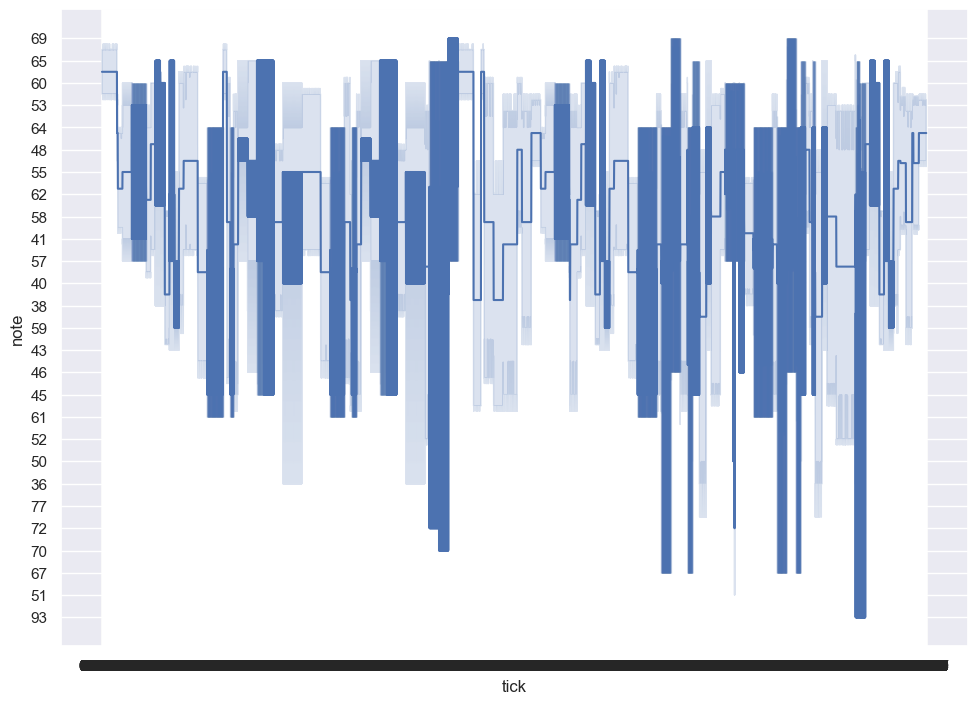

In [64]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# loading dataset
data = df_notes_series

# draw jointplot with
# hex kind
sns.lineplot(x = "tick", y = "note", sizes=(.25, 2.5), data = data)
# show the plot
plt.show()

In [ ]:
ls_times_notes_series